In [1]:
import glob #to read the files
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
from scipy.interpolate import interp1d
import os.path 
from tabulate import tabulate #to export in table format

In [2]:
X_ = np.linspace(3300, 8500, 521)
save_path = '/home/joao/Documentos/templates/data_ext'

In [3]:
training_set = ["SN2011fe"]

In [7]:
sn_names=glob.glob("/home/joao/Documentos/templates/data/"+training_set[0]+"0"+".dat")

#print(sn_names)

for p in range(0,len(sn_names)):

    sn_names[p] = sn_names[p][37:]
    
for i in range(0,len(sn_names)):
    print(i)
    y = []
    z = []

    file = open(sn_names[i])
    lines = file.readlines()
    file.close()

    for line in lines:
        if line.startswith('#'): continue
        co=line.rstrip().replace('INDEF','Nan').split()

        y.append(co[0])
        z.append(co[1])


    y = np.array(y, dtype=float)
    z = np.array(z, dtype=float)

    
    
    if min(y) < 3900:
        
        if max(y) > 6500:

            timetemp = lines[0]
            timetemp = timetemp[:-1]
            timetemp = float(timetemp[1:])

            interpolation = interp1d(y, z)

            yred = np.linspace(min(y), max(y), 500)

            zred = interpolation(yred)

            f = max(zred)

            zred = zred/f

            yredgp = []
            for k in range(0,len(zred)):

                yredgp.append([yred[k]])
                
            kernel = 1.0 * RBF(length_scale=(max(y)-min(y))/500, length_scale_bounds=((max(y)-min(y))/1000, (max(y)-min(y))/250))

            gp = GaussianProcessRegressor(kernel=kernel, alpha=0.0).fit(yredgp, zred)

            val_score = gp.score(yredgp, zred)

            #score.append(val_score)

            y_mean, y_cov= gp.predict(X_[:, np.newaxis], return_cov=True)
            

0


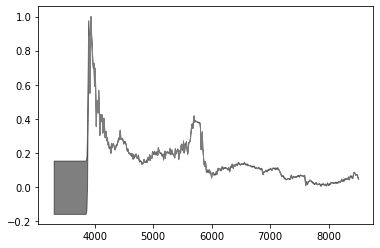

In [8]:
%matplotlib inline
plt.fill_between(X_, y_mean - np.sqrt(np.diag(y_cov)),
                 y_mean + np.sqrt(np.diag(y_cov)),
                 alpha=0.5, color='k')

#plt.plot(y,z, 'ko')
#plt.plot(X_,y_mean*f, 'bo')
plt.show()

In [9]:
y_mean

array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       1.45146852e-317, 1.97650933e-305, 1.55998352e-293, 7.13628381e-282,
       1.89214834e-270, 2.90783132e-259, 2.59008610e-248, 1.33718087e-237,
       4.00126277e-227, 6.93960823e-217, 6.97595701e-207, 4.06446699e-197,
       1.37256958e-187, 2.68655724e-178, 3.04781633e-169, 2.00406797e-160,
       7.63777859e-152, 1.68714592e-143, 2.16007678e-135, 1.60293789e-127,
       6.89437914e-120, 1.71871787e-112, 2.48339034e-105, 2.07977496e-098,
       1.00952869e-091, 2.84021980e-085, 4.63144170e-079, 4.37735148e-073,
       2.39793612e-067, 7.61368280e-062, 1.40114455e-056, 1.49452135e-051,
       9.23958291e-047, 3.31080616e-042, 6.87616722e-038, 8.27733739e-034,
       5.77519846e-030, 2.33547946e-026, 5.47418689e-023, 7.43704485e-020,
       5.85630102e-017, 2.67299121e-014, 7.07194162e-012, 1.08461213e-009,
       9.64387850e-008, 4